# INPUT

In [37]:
###  INPUT ###
import pandas as pd
input_data = pd.read_csv('2023_smartFarm_AI_hackathon_dataset.csv')

# Data preprocessing

In [38]:
input_data.head()

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
0,DBSF1059,20220926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
1,DBSF1059,20221001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1347.554178,202.133127,4711.308821,5936.249114,0.000000,0.0000,190.168990,2221.173803,0.0
2,DBSF1059,20221002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,69.899353,10.484903,271.379890,341.938662,0.000000,0.0000,0.000000,0.000000,0.0
3,DBSF1059,20221003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,412.225065,61.833760,1539.505534,1939.776973,253.744916,149.7095,0.000000,0.000000,0.0
4,DBSF1059,20221004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,590.608634,88.591295,2614.973165,3294.866187,3032.885084,1789.4022,1.149739,13.428955,0.0


In [8]:
input_data.shape # 총 84840개의 데이터

(84840, 47)

In [6]:
input_data.info() # 일단 null은 없음 / 0으로 있겠지

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84840 entries, 0 to 84839
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   frmDist                    84840 non-null  object 
 1   date                       84840 non-null  int64  
 2   inTp                       84840 non-null  float64
 3   inHd                       84840 non-null  float64
 4   otmsuplyqy                 84840 non-null  float64
 5   acSlrdQy                   84840 non-null  float64
 6   cunt                       84840 non-null  float64
 7   ph                         84840 non-null  float64
 8   outTp                      84840 non-null  float64
 9   outWs                      84840 non-null  float64
 10  daysuplyqy                 84840 non-null  float64
 11  inCo2                      84840 non-null  float64
 12  ec                         84840 non-null  float64
 13  frmYear                    84840 non-null  int

In [39]:
# 시각화에 필요한 라이브러리 임포트
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 내부에 결과를 출력하도록 설정
%matplotlib inline
# 시각화 한글 폰트 설정
# 윈도우 사용자
plt.rc('font', family='Malgun Gothic')
# Mac 사용자
#plt.rc('font', family='AppleGothic')
# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False) 
# 분석에 문제가 없는 경고 메세지는 숨긴다.
import warnings
warnings.filterwarnings('ignore') 


In [ ]:
# 타깃 변수의 이름 (바꿔야 하는 부분)
target_column = 'outtrn_cumsum'

train_data = input_data.copy()  # 학습 데이터 복사본 생성

# 모든 피처에 대한 분포 시각화
for feature in train_data.columns:
    if feature != target_column:
        plt.figure(figsize=(8, 4))
        plt.title(f'Distribution of {feature} by {target_column}')
        sns.histplot(data=train_data, x=feature, hue=target_column, kde=True)
        plt.show()

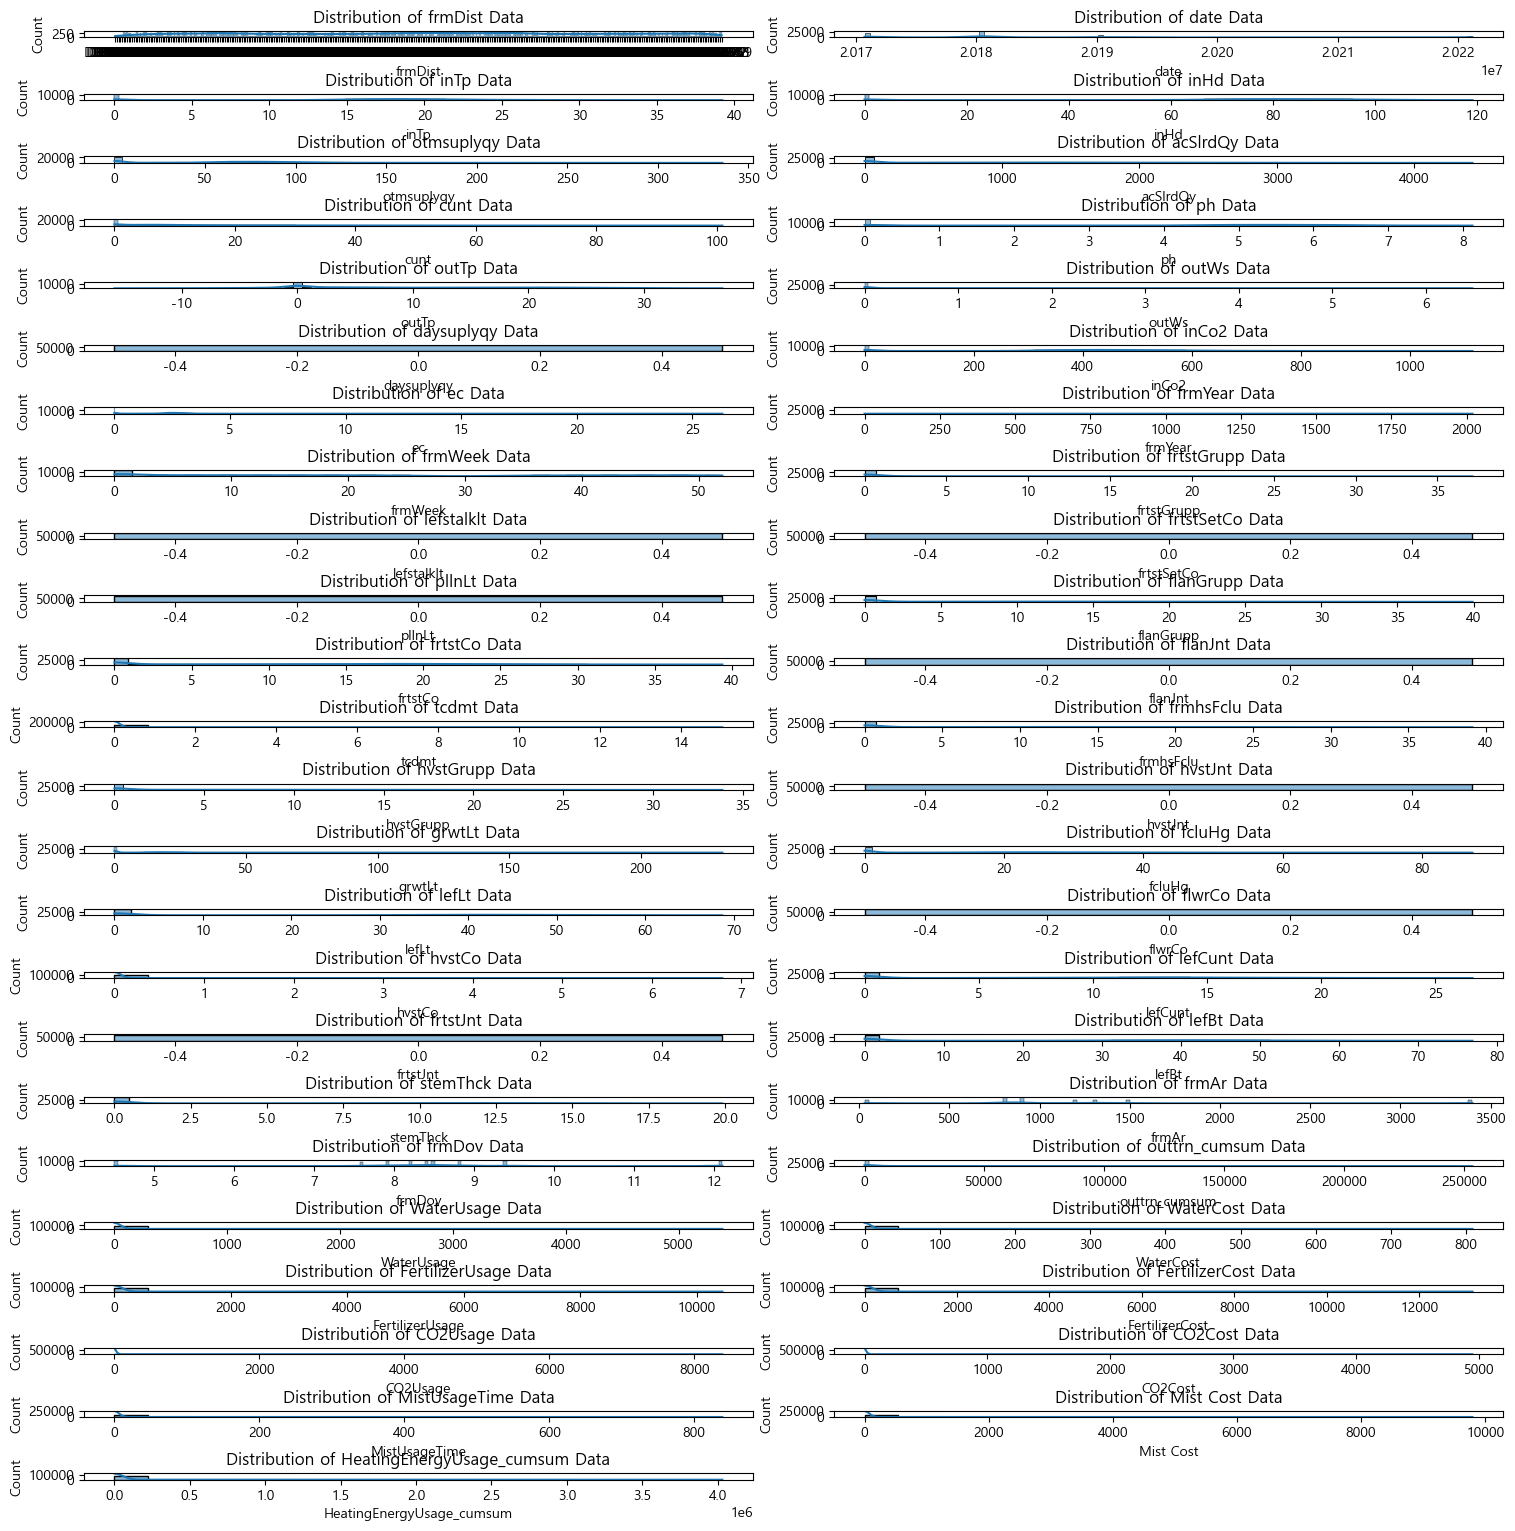

In [67]:
#각 피처의 분포도 확인
plt.figure(figsize=(15, 15))
for i, col in enumerate(train_data.columns, 1):
    plt.subplot(24, 2, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(train_data[col], kde=True)
    plt.tight_layout()

# plt.show()를 호출하여 그래프를 보여줍니다.
plt.show()

In [ ]:
#각 피처의 분포도 확인
plt.figure(figsize=(15, 15))
for i, col in enumerate(train_data.columns, 1):
    sns.distplot(i, kde = False, bins = 50)
    plt.axis([0, 50, 0, 450000]) # [x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값]
    plt.title("퇴근 시간 승차 인원 히스토그램") # 그래프 제목 지정
    plt.show() # 그래프 그리기

# plt.show()를 호출하여 그래프를 보여줍니다.
plt.show()

In [ ]:
# 각 열별로 0값의 수 세기

df = pd.DataFrame(train_data)
count_of_zeros_per_column = (df == 0).sum()

print("각 열별 0값의 수:")
print(count_of_zeros_per_column)


<모두 0인 피처 및 거의 모두 0인 피처>
1. 모두 0
    daysuplyqy  일 급액량
    lefstalklt  엽병장(잇몸부분을 유지하는 자루 길이)
    frtstSetCo  착과 수
    pllnLt      초장
    flanJnt     개화된 마디
    hvstJnt     수확 마디
    flwrCo      꽃의 수
    frtstJnt    착과된 마디
2. 거의 0
    tcdmt     관부 직경 - 83400
    CO2Usage  CO2사용량(L) - 83700
    CO2Cost   CO2사용비용(원) - 83700


In [ ]:
#    Write codes...
# ... (Data preprocessing code here)
input_data = input_data.drop(columns=['frmDist'])




In [ ]:

# Split the data into training and testing sets
X = input_data[input_data.drop(columns=['outtrn_cumsum','HeatingEnergyUsage_cumsum']).columns]
Y = input_data[['outtrn_cumsum','HeatingEnergyUsage_cumsum']]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)



In [ ]:
# Initialize and train the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Predict 'y' values using the trained model
y_pred = model.predict(X_test)

In [ ]:
# Calculate RMSE between the predictions and actual 'y' values
def calculate_rmse(targets, predictions):
    """
    Calculate the Root Mean Squared Error (RMSE) between predicted and target values.

    :param predictions: Predicted values.
    :type predictions: array-like
    :param targets: Target values.
    :type targets: array-like
    :return: RMSE value.
    :rtype: float
    """
    from sklearn.metrics import mean_squared_error
    return np.sqrt(mean_squared_error(targets, predictions))

# Calculate r2_score between the predictions and actual 'y' values
def calculate_R2_score(y_test,y_pred):
    from sklearn.metrics import r2_score
    return r2_score(y_test, y_pred)

rmse = calculate_rmse(y_test, y_pred)
r2score = calculate_R2_score(y_test, y_pred)


In [ ]:
### OUTPUT ###
print("RMSE:", rmse)
print("R2_score:", r2score)
